#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

# Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 - Data loading and exploration

In [4]:
# Load your dataset
df = pd.read_csv('/content/sample_data/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [7]:
num_rows, num_cols = df.shape
data_types = df.dtypes
missing_values = df.isnull().sum()

In [14]:
print(f"Number of rows = {num_rows} \n")
print(f"Number of columns = {num_cols} \n")
print(f"the data types of each column : \n \n  {data_types} \n")
print(f"missing values in each column  : \n {missing_values }\n")

Number of rows = 148654 

Number of columns = 13 

the data types of each column : 
 
  Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object 

missing values in each column  : 
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64



# 2 - Descriptive Statistics

In [15]:
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().values[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
# Range = Max - Min
salary_range = max_salary - min_salary
std_salary = df['TotalPay'].std()

In [17]:
print(f"Mean Salary = {mean_salary}")
print(f"Median Salary = {median_salary}")
print(f"Mode Salary = {mode_salary}")
print(f"Minimum Salary = {min_salary}")
print(f"Maximum Salary = {max_salary}")
print(f"Salary Range = {salary_range}")
print(f"Standard Deviation of Salary =  {std_salary}")


Mean Salary = 74768.32197169267
Median Salary = 71426.60999999999
Mode Salary = 0.0
Minimum Salary = -618.13
Maximum Salary = 567595.43
Salary Range = 568213.56
Standard Deviation of Salary =  50517.00527394987


# 3 - Data Cleaning

In [18]:
# Dropping columns with mostly missing values
cleaned_data = df.drop(columns=['Notes', 'Status'])
# Filling missing values with mean
cleaned_data['BasePay'].fillna(cleaned_data['BasePay'].mean(), inplace=True)
 # Dropping rows with missing values in specific columns
cleaned_data.dropna(subset=['OvertimePay', 'OtherPay'], inplace=True)
# Filling missing values with 0 for Benefits column
cleaned_data['Benefits'].fillna(0, inplace=True)

# 4 - Basic Data Visualization

Create histograms to visualize the distribution of salaries

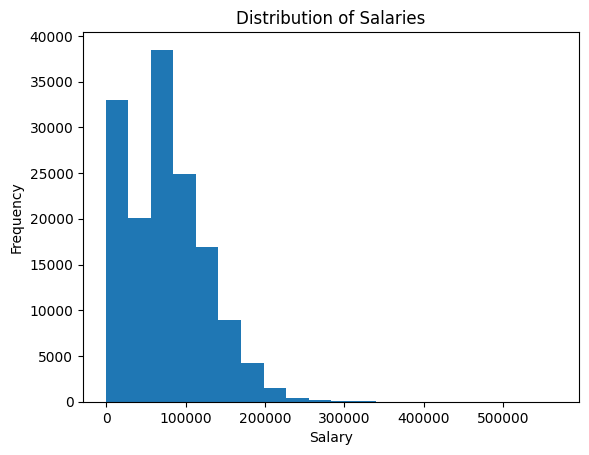

In [20]:
plt.hist(cleaned_data['TotalPay'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()


pie charts to represent the proportion of employees in different departments.

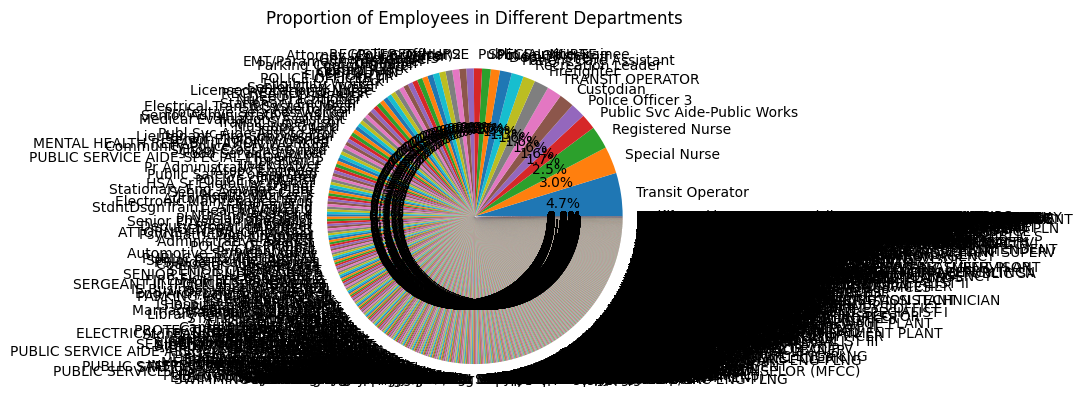

In [21]:
department_counts = cleaned_data['JobTitle'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

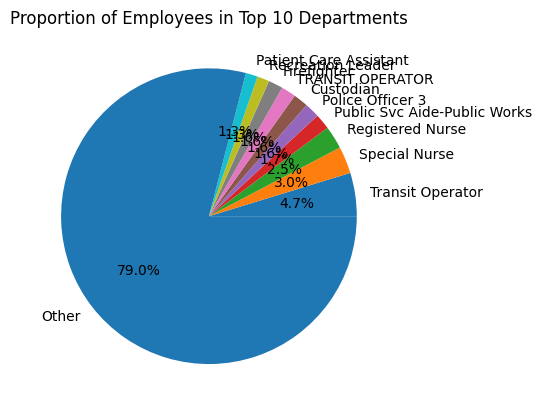

In [24]:
department_counts = cleaned_data['JobTitle'].value_counts()
top_departments = department_counts.head(10)
other_departments = department_counts[10:]
other_departments_count = other_departments.sum()

# Combine top 10 departments and create a new 'Other' category
combined_departments = pd.concat([top_departments, pd.Series(other_departments_count, index=['Other'])])

plt.pie(combined_departments, labels=combined_departments.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Top 10 Departments')
plt.show()

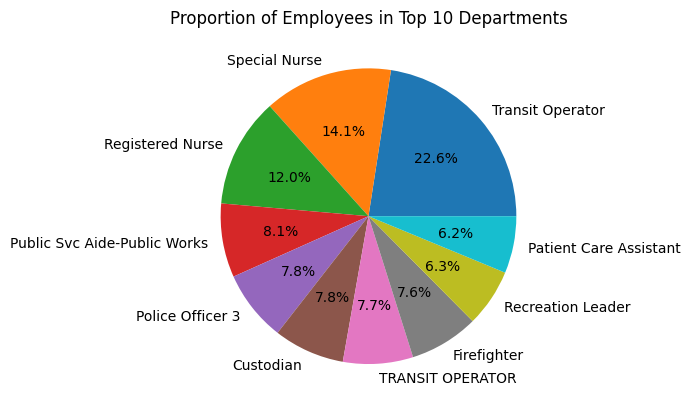

In [23]:
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Employees in Top 10 Departments')
plt.show()

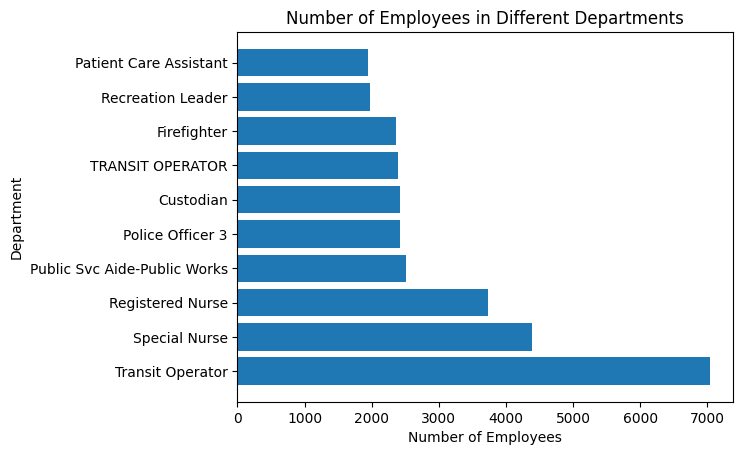

In [22]:
# Consider top 10 departments
department_counts = cleaned_data['JobTitle'].value_counts().head(10)
plt.barh(department_counts.index, department_counts.values)
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.title('Number of Employees in Different Departments')
plt.show()

# 5 - Grouped Analysis

In [26]:
grouped_data = cleaned_data.groupby('JobTitle')['TotalPay'].mean()
grouped_data_sorted = grouped_data.sort_values(ascending=False).head(10)

In [32]:
print(f"Average salaries across job titles: \n \n {grouped_data} ")

Average salaries across job titles: 
 
 JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2158, dtype: float64 


In [33]:
print(f"Average salaries across departments (top 10): \n \n {grouped_data_sorted}")

Average salaries across departments (top 10): 
 
 JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)            302377.730000
Gen Mgr, Public Trnsp Dept                        297769.413333
Asst Chf of Dept (Fire Dept)                      281763.483889
DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)      279359.560000
Dep Dir for Investments, Ret                      278592.545000
Name: TotalPay, dtype: float64


# 6 - Scatter Plot Visualization

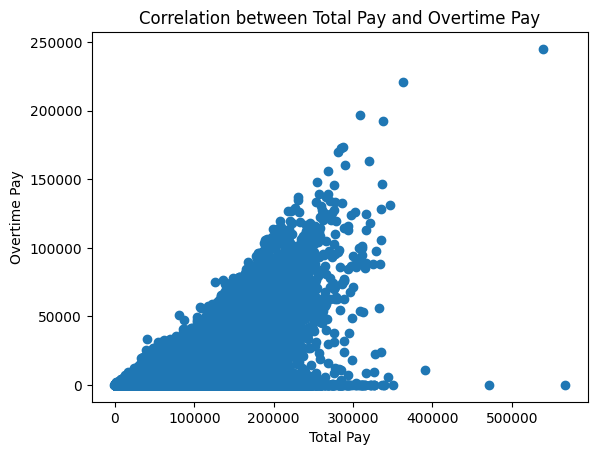

Correlation coefficient: 0.5048588704522461


In [36]:
# Calculate the correlation
correlation = df['TotalPay'].corr(df['OvertimePay'])

# Visualize the relationship
plt.scatter(df['TotalPay'], df['OvertimePay'])
plt.xlabel('Total Pay')
plt.ylabel('Overtime Pay')
plt.title('Correlation between Total Pay and Overtime Pay')
plt.show()

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

# 7 - Summary of Insights 🧐📈📝

Summary of Insights:

1. Dataset Overview:
The dataset contains information about employees in an organization, including their names, job titles, base pay, overtime pay, other pay, benefits, total pay, total pay including benefits, year, agency, and status. The dataset consists of 148,654 rows and 13 columns.

2. Data Types and Missing Values:
The dataset contains a mix of data types, including integers, floats, and objects. The "Notes" and "Status" columns have missing values for all rows. The "BasePay" column has 609 missing values, "OvertimePay" and "OtherPay" have 4 missing values each, and "Benefits" has 36,163 missing values.

3. Descriptive Statistics:
The mean salary is approximately $74,768.32, and the median salary is around $71,426.61. The mode salary is 0, indicating that there are many employees with no salary. The minimum salary is negative (-$618.13), which might indicate an error in the data entry. The maximum salary is $567,595.43. The range of salaries is $568,213.56. The standard deviation of salaries is $50,517.01.

4. Data Cleaning:
To handle missing values, the "Notes" and "Status" columns, which have missing values for all rows, are dropped from the dataset. For the "BasePay" column, the missing values are filled with the mean value of the column. The rows with missing values in the "OvertimePay" and "OtherPay" columns are dropped. The missing values in the "Benefits" column are filled with 0.

5. Basic Data Visualization:
A histogram is created to visualize the distribution of salaries. The histogram shows the frequency of salaries within certain ranges. The majority of employees have salaries in the lower range, and the frequency decreases as the salary range increases.

A pie chart is used to represent the proportion of employees in different departments. Initially, the pie chart includes all departments, but due to the large number of departments, the chart becomes crowded. To address this, a revised pie chart is created to show only the top 10 departments based on the number of employees.

6. Grouped Analysis:
The data is grouped by job titles, and the average salaries are calculated for each group. The analysis shows the average salaries across different job titles, ranging from approximately $29,031.74 for an "ACCOUNTANT INTERN" to $44035.66 for an "ACCOUNT CLERK."

Additionally, the data is grouped by departments, and the average salaries for the top 10 departments are calculated. The analysis reveals that the "GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY" has the highest average salary, followed by positions such as "Chief Investment Officer" and "Chief of Police."

7. Simple Correlation Analysis:
A correlation analysis is performed to identify any correlation between total pay and overtime pay. The correlation coefficient is approximately 0.505, indicating a moderate positive correlation between total pay and overtime pay. This suggests that as total pay increases, overtime pay tends to increase as well.

# Good Luck!